In [2]:
# The first step here cleans the TCGA-BRCA data, matching RPPA data with mRNA data. Then, dividing the RPPA data into two groups, with q1
# as the lowest levels of p-SHP2 and q3 as the highest ones. 

In [3]:
# import all the packages used in this study
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
import re

# import the raw_datasets
df_clinic=pd.read_csv("clinical_raw.csv", dtype=str).transpose()
df_mRNA=pd.read_csv("mRNA_raw.csv",dtype=str).dropna().transpose()
df_RPPA=pd.read_csv("RPPA_raw.csv",dtype=str).dropna().transpose()

# reset the header of each raw_datasets
df_clinic.columns=df_clinic.iloc[0]
df_clinic=df_clinic.drop("admin.batch_number", axis=0)
df_mRNA.columns=df_mRNA.iloc[0]
df_mRNA=df_mRNA.drop("Hybridization REF", axis=0).reset_index()
df_mRNA=df_mRNA.rename({"index":"Hybridization REF"}, axis="columns")
df_mRNA["Hybridization REF"]=[x.lower() for x in df_mRNA["Hybridization REF"]]
df_mRNA=df_mRNA.set_index("Hybridization REF")

df_RPPA.columns=df_RPPA.iloc[0]
df_RPPA=df_RPPA.drop("Composite.Element.REF",axis=0).reset_index()
df_RPPA=df_RPPA.rename({"index":"Composite.Element.REF"}, axis="columns")
df_RPPA["Composite.Element.REF"]=[x.lower() for x in df_RPPA["Composite.Element.REF"]]
df_RPPA=df_RPPA.set_index("Composite.Element.REF")

# select some columns interested in clinics data
col=["patient.samples.sample.portions.portion.analytes.analyte-2.aliquots.aliquot-2.bcr_aliquot_barcode", 
     "patient.samples.sample.portions.shipment_portion.shipment_portion_bcr_aliquot_barcode","patient.samples.sample.bcr_sample_barcode"]
df_clinic_sub=df_clinic[col]

# Rename the columns to fit the mRNA and RPPA datasets
df_clinic_sub=df_clinic_sub.rename({"patient.samples.sample.portions.portion.analytes.analyte-2.aliquots.aliquot-2.bcr_aliquot_barcode":
                                   "Hybridization REF","patient.samples.sample.portions.shipment_portion.shipment_portion_bcr_aliquot_barcode":
                                   "Composite.Element.REF"}, axis="columns")

# set index of selected clinic data and merge with mRNA dataset
df_merge=pd.merge(df_clinic_sub,df_mRNA, how="outer", on="Hybridization REF").dropna()
df_merge=df_merge.reset_index()
df_merge=df_merge.set_index("Composite.Element.REF")
df_merge=pd.merge(df_merge, df_RPPA, how="outer", on="Composite.Element.REF").dropna()
df_merge

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  return op.get_result()


,index,Hybridization REF,patient.samples.sample.bcr_sample_barcode,Composite Element REF,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,...,CDKN1B|p27_pT157,CDKN1B|p27_pT198,MAPK14|p38_MAPK,MAPK14|p38_pT180_Y182,TP53|p53,SQSTM1|p62-LCK-ligand,RPS6KB1|p70S6K,RPS6KB1|p70S6K_pT389,RPS6KA1|p90RSK,RPS6KA1|p90RSK_pT359_S363
Composite.Element.REF,,,,,,,,,,,,,,,,,,,,,
tcga-bh-a0ea-01a-21-a13c-20,49.0,tcga-bh-a0ea-01a-11r-a115-07,tcga-bh-a0ea-01a,log2 lowess normalized (cy5/cy3) collapsed by ...,-0.604833333,1.20275,0.3035,-0.36625,1.187166667,-1.3675,...,-0.228381357,-0.333089444,-0.068365676,0.009476069,-1.123390328,-0.921933294,-0.445618366,-0.151993511,-0.334864763,0.071638985
tcga-bh-a18h-01a-21-a13f-20,50.0,tcga-bh-a18h-01a-11r-a12d-07,tcga-bh-a18h-01a,log2 lowess normalized (cy5/cy3) collapsed by ...,0.36925,0.8205,2.4975,-0.73025,-0.103666667,-2.45875,...,-0.021784682,0.011664654,0.341965269,0.203493004,0.264005656,0.42890725,0.125680239,-0.007199293,0.183334203,0.075611013
tcga-c8-a1hl-01a-21-a17j-20,53.0,tcga-c8-a1hl-01a-11r-a137-07,tcga-c8-a1hl-01a,log2 lowess normalized (cy5/cy3) collapsed by ...,0.573,2.633,0.236,-0.29025,0.628666667,-2.88375,...,0.004569226,-0.053229513,0.498370765,-0.420274353,-0.280243305,0.399689228,1.638963647,-0.266090285,0.23066662,0.595945589
tcga-d8-a146-01a-21-a13d-20,54.0,tcga-d8-a146-01a-31r-a115-07,tcga-d8-a146-01a,log2 lowess normalized (cy5/cy3) collapsed by ...,0.287083333,1.81775,-0.2945,0.599,1.728,-1.671,...,-0.11878716,-0.110126275,0.009863187,-0.358472283,-0.049301652,0.344797376,-0.127880664,-0.352134045,0.208897469,0.331329178
tcga-e2-a158-01a-21-a13e-20,55.0,tcga-e2-a158-01a-11r-a12d-07,tcga-e2-a158-01a,log2 lowess normalized (cy5/cy3) collapsed by ...,-0.613583333,-0.2965,1.737125,-0.747,-1.687166667,2.10775,...,0.124570666,-0.035025312,-0.165198563,-0.380797259,0.547262613,-1.193269322,-0.187083324,-0.218506722,0.220631428,0.248111217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tcga-e2-a1b1-01a-11-a13e-20,869.0,tcga-e2-a1b1-01a-21r-a12p-07,tcga-e2-a1b1-01a,log2 lowess normalized (cy5/cy3) collapsed by ...,1.15775,1.89825,0.35225,0.50025,2.484,-1.91425,...,0.308100866,0.088775106,0.128242936,0.876816983,-0.301321004,-0.122365316,0.473677851,-0.074594362,0.020735911,0.125236408
tcga-e2-a1b4-01a-21-a13e-20,870.0,tcga-e2-a1b4-01a-11r-a12p-07,tcga-e2-a1b4-01a,log2 lowess normalized (cy5/cy3) collapsed by ...,-0.351166667,1.71825,0.326125,-0.3635,0.400666667,-1.72625,...,0.001579647,-0.134038289,0.196523692,0.172802531,-0.289232527,-0.892198651,-0.206765754,-0.268250167,0.770893786,-0.57462026
tcga-e2-a1b5-01a-31-a13e-20,871.0,tcga-e2-a1b5-01a-21r-a12p-07,tcga-e2-a1b5-01a,log2 lowess normalized (cy5/cy3) collapsed by ...,-0.210416667,-0.07175,0.603625,-1.2445,-1.006,0.9515,...,-0.008807962,-0.382577402,0.580680963,0.357839435,-2.263861609,0.368440337,0.766563347,0.263891601,-0.627195208,-1.182336334


In [4]:
df_merge=df_merge.drop("index",axis=1)
df_merge=df_merge.drop("Hybridization REF",axis=1)
df_merge=df_merge.drop("patient.samples.sample.bcr_sample_barcode",axis=1)
df_merge=df_merge.drop("Composite Element REF",axis=1)
df_merge

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,CDKN1B|p27_pT157,CDKN1B|p27_pT198,MAPK14|p38_MAPK,MAPK14|p38_pT180_Y182,TP53|p53,SQSTM1|p62-LCK-ligand,RPS6KB1|p70S6K,RPS6KB1|p70S6K_pT389,RPS6KA1|p90RSK,RPS6KA1|p90RSK_pT359_S363
Composite.Element.REF,,,,,,,,,,,,,,,,,,,,,
tcga-bh-a0ea-01a-21-a13c-20,-0.604833333,1.20275,0.3035,-0.36625,1.187166667,-1.3675,-0.205833333,0.168,-0.18675,0.083,...,-0.228381357,-0.333089444,-0.068365676,0.009476069,-1.123390328,-0.921933294,-0.445618366,-0.151993511,-0.334864763,0.071638985
tcga-bh-a18h-01a-21-a13f-20,0.36925,0.8205,2.4975,-0.73025,-0.103666667,-2.45875,-1.266,0.09325,0.643125,0.837,...,-0.021784682,0.011664654,0.341965269,0.203493004,0.264005656,0.42890725,0.125680239,-0.007199293,0.183334203,0.075611013
tcga-c8-a1hl-01a-21-a17j-20,0.573,2.633,0.236,-0.29025,0.628666667,-2.88375,-0.408333333,1.1405,1.183375,0.093,...,0.004569226,-0.053229513,0.498370765,-0.420274353,-0.280243305,0.399689228,1.638963647,-0.266090285,0.23066662,0.595945589
tcga-d8-a146-01a-21-a13d-20,0.287083333,1.81775,-0.2945,0.599,1.728,-1.671,-0.2,0.012,-2.014625,0.1785,...,-0.11878716,-0.110126275,0.009863187,-0.358472283,-0.049301652,0.344797376,-0.127880664,-0.352134045,0.208897469,0.331329178
tcga-e2-a158-01a-21-a13e-20,-0.613583333,-0.2965,1.737125,-0.747,-1.687166667,2.10775,1.361666667,0.2745,-2.281375,0.764,...,0.124570666,-0.035025312,-0.165198563,-0.380797259,0.547262613,-1.193269322,-0.187083324,-0.218506722,0.220631428,0.248111217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tcga-e2-a1b1-01a-11-a13e-20,1.15775,1.89825,0.35225,0.50025,2.484,-1.91425,-0.458166667,0.903,0.034125,0.241,...,0.308100866,0.088775106,0.128242936,0.876816983,-0.301321004,-0.122365316,0.473677851,-0.074594362,0.020735911,0.125236408
tcga-e2-a1b4-01a-21-a13e-20,-0.351166667,1.71825,0.326125,-0.3635,0.400666667,-1.72625,0.604333333,0.7085,1.288375,-0.2805,...,0.001579647,-0.134038289,0.196523692,0.172802531,-0.289232527,-0.892198651,-0.206765754,-0.268250167,0.770893786,-0.57462026
tcga-e2-a1b5-01a-31-a13e-20,-0.210416667,-0.07175,0.603625,-1.2445,-1.006,0.9515,-0.852833333,1.27775,-1.034375,0.74,...,-0.008807962,-0.382577402,0.580680963,0.357839435,-2.263861609,0.368440337,0.766563347,0.263891601,-0.627195208,-1.182336334


In [5]:
df_merge=df_merge.astype(float)
df_merge
div=np.median(df_merge["PTPN11|SHP-2_pY542"])
q1=np.quantile(df_merge["PTPN11|SHP-2_pY542"],0.25)
q3=np.quantile(df_merge["PTPN11|SHP-2_pY542"],0.75)
df_pSHP2_low=df_merge.where(df_merge["PTPN11|SHP-2_pY542"]<=q1).dropna()
df_pSHP2_high=df_merge.where(df_merge["PTPN11|SHP-2_pY542"]>q3).dropna()
df_pSHP2_low=df_pSHP2_low.transpose()
df_pSHP2_low=df_pSHP2_low[0:17280]
df_pSHP2_high=df_pSHP2_high.transpose()
df_pSHP2_high=df_pSHP2_high[0:17280]
df_pSHP2_low

Composite.Element.REF,tcga-c8-a1hl-01a-21-a17j-20,tcga-a2-a0cs-01a-21-a13b-20,tcga-a2-a0t3-01a-11-a13d-20,tcga-a2-a0yc-01a-21-a13d-20,tcga-a2-a0yh-01a-21-a13d-20,tcga-a2-a0yl-01a-11-a13d-20,tcga-a2-a0yt-01a-21-a13d-20,tcga-a7-a13f-01a-21-a13e-20,tcga-an-a0xw-01a-21-a13d-20,tcga-ao-a03n-01b-21-a13e-20,...,tcga-e2-a107-01a-21-a13d-20,tcga-e2-a14n-01a-21-a17i-20,tcga-e2-a14o-01a-21-a13e-20,tcga-e2-a14q-01a-21-a13e-20,tcga-e2-a15i-01a-11-a17i-20,tcga-e2-a15k-01a-21-a13e-20,tcga-e2-a15m-01a-21-a13e-20,tcga-e2-a1b0-01a-21-a13e-20,tcga-e2-a1b5-01a-31-a13e-20,tcga-e2-a1b6-01a-21-a13e-20
ELMO2,0.573000,0.470917,0.042417,0.529917,1.126250,-0.166167,0.313750,2.759167,0.670833,0.143500,...,-0.472750,-0.924833,0.272833,0.069583,-0.549333,0.03925,0.918750,-0.068167,-0.210417,-0.037083
CREB3L1,2.633000,1.945250,1.817750,0.113750,0.652500,0.729500,0.113500,1.393750,1.542250,3.220250,...,0.397500,0.037500,1.016500,0.989500,1.701750,1.93450,1.600250,0.968250,-0.071750,1.400250
RPS11,0.236000,0.136000,1.219125,-0.216250,0.119500,0.853500,-0.115125,0.458375,0.632625,-0.011250,...,-0.178625,0.116625,0.267500,1.178000,0.755500,0.08975,0.926625,0.226875,0.603625,1.406625
PNMA1,-0.290250,0.380250,0.916750,0.074250,0.866750,0.399250,-0.398000,-1.714500,0.031250,-0.758750,...,-0.513000,-0.965000,0.007500,0.978500,-0.512500,-0.75000,0.272250,-0.036750,-1.244500,-0.421250
MMP2,0.628667,1.268667,0.100333,0.593167,1.315667,1.550333,-0.132000,1.991000,1.870333,0.676667,...,-0.512833,-1.453500,0.762500,0.333000,0.668333,0.57500,0.979667,1.279167,-1.006000,-0.217167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,1.927250,1.781500,0.760750,2.262250,2.574250,2.703000,1.904500,1.932250,2.400250,0.444250,...,1.912000,1.555750,1.540750,1.952250,2.073500,2.43500,2.835250,2.120500,2.799500,3.444000
SLC39A6,-0.466600,2.475700,1.610100,3.478800,2.428200,-0.276800,-0.211500,3.082600,0.806000,-1.059000,...,2.780300,-1.998800,2.340300,1.285200,1.208900,1.49700,-0.260100,-1.349900,-2.616100,1.931500
SNRPD2,0.063800,0.661700,1.390500,-0.332400,0.447600,-0.081600,-0.106100,-0.029600,0.346800,0.368100,...,0.016500,0.005800,0.942300,0.441200,-0.198600,0.25300,0.341000,-0.053400,0.574100,0.316800
AQP7,-0.838500,-0.709500,0.251000,0.675500,-0.661500,-0.440000,-0.883500,-0.164000,-1.227500,-0.674500,...,-0.572500,-0.351000,-0.515500,-0.179000,-1.373500,-0.77900,3.159500,-0.068500,-0.220000,1.678000


In [11]:
# The groups with lowest levels of p-SHP2 was export as csv files. 
df_pSHP2_low.to_csv("df_pSHP2_low.csv")

In [12]:
# The groups with highest levels of p-SHP2 was export as csv files. 
df_pSHP2_high.to_csv("df_pSHP2_high.csv")

In [6]:
# To impute with LM22, the gene symbols in these two csv files should matches the one in LM22, which are listed in sample.csv here. 
# We import these gene symbols as a list 'ls_sample' 
df_sample=pd.read_csv("sample.csv", dtype=str)
ls_sample=[item for item in df_sample["GeneSymbol"]]
ls_sample

['A1BG',
 'A1BG-AS1',
 'A1CF',
 'A2M',
 'A2M-AS1',
 'A2ML1',
 'A4GALT',
 'A4GNT',
 'AA06',
 'AAAS',
 'AACS',
 'AACSP1',
 'AADAC',
 'AADACL2',
 'AADACP1',
 'AADAT',
 'AAED1',
 'AAGAB',
 'AAK1',
 'AAMDC',
 'AAMP',
 'AANAT',
 'AAR2',
 'AARS',
 'AARS2',
 'AASDH',
 'AASDHPPT',
 'AASS',
 'AATBC',
 'AATF',
 'AATK',
 'ABAT',
 'ABCA1',
 'ABCA11P',
 'ABCA12',
 'ABCA13',
 'ABCA17P',
 'ABCA2',
 'ABCA3',
 'ABCA4',
 'ABCA5',
 'ABCA6',
 'ABCA7',
 'ABCA8',
 'ABCA9',
 'ABCB1',
 'ABCB10',
 'ABCB11',
 'ABCB4',
 'ABCB5',
 'ABCB6',
 'ABCB7',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC12',
 'ABCC13',
 'ABCC2',
 'ABCC3',
 'ABCC4',
 'ABCC5',
 'ABCC6',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD1P2',
 'ABCD2',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG1',
 'ABCG2',
 'ABCG4',
 'ABCG5',
 'ABCG8',
 'ABHD1',
 'ABHD10',
 'ABHD11',
 'ABHD12',
 'ABHD12B',
 'ABHD13',
 'ABHD14A',
 'ABHD14B',
 'ABHD15',
 'ABHD16A',
 'ABHD16B',
 'ABHD17B',
 'ABHD17C',
 'ABHD18',
 'ABHD2',
 'ABHD3',
 'ABHD4

In [7]:
# Next, we use the ls_sample to filter the df_pSHP2_low and df_pSHP2_high, only the matched gene symbols will be retained. 
lslow=df_pSHP2_low.index
lslow=[item for item in lslow]
lslow2=[]
x=0
for item in lslow:
    if (item in ls_sample)&(item in lslow):
        lslow2.append(item)
        x=x+1
lslow2

['ELMO2',
 'CREB3L1',
 'RPS11',
 'PNMA1',
 'MMP2',
 'C10orf90',
 'ZHX3',
 'RXFP3',
 'APBB2',
 'KLHL13',
 'DECR1',
 'SALL1',
 'CADM4',
 'CFHR5',
 'SLC10A7',
 'LMAN1',
 'CHD8',
 'SUMO1',
 'GP1BA',
 'DDB1',
 'MYO9B',
 'MMP7',
 'CRNKL1',
 'XAB2',
 'RTN1',
 'KLHL14',
 'TBX10',
 'CENPQ',
 'UTY',
 'ZBTB12',
 'DTNBP1',
 'KBTBD8',
 'ZEB1',
 'ZG16',
 'MIER1',
 'CHD9',
 'STK16',
 'TOB2',
 'BANK1',
 'GRM2',
 'PROSC',
 'PIR',
 'IPO9',
 'EVC',
 'CXCL13',
 'SORL1',
 'NAT10',
 'CHD1',
 'SYN3',
 'SLC22A2',
 'SERPINF1',
 'WDR34',
 'OR7A17',
 'LHB',
 'STK25',
 'TAOK3',
 'CDC25B',
 'BMP3',
 'MAP1LC3C',
 'CRYGC',
 'POU3F1',
 'HIGD1B',
 'USP6NL',
 'ABCD4',
 'TEK',
 'SLC25A46',
 'LARP7',
 'CD160',
 'PHF20',
 'CPNE4',
 'GTPBP1',
 'RAB33B',
 'ALDOC',
 'ZNF212',
 'NUDT1',
 'RFPL2',
 'ZNF83',
 'GDPD5',
 'PDCD4',
 'CEP350',
 'CST7',
 'CIAO1',
 'SELL',
 'LTBP4',
 'SIRT6',
 'CCL19',
 'PPIL1',
 'STK17A',
 'ABR',
 'FOXE1',
 'CNGA3',
 'GML',
 'CD38',
 'ZDHHC6',
 'NEFH',
 'CTDSP2',
 'PGBD5',
 'CCNY',
 'RMND5B',
 'ZNF25

In [26]:
# filter in process... 
df_pSHP2_low2 = df_pSHP2_low.loc[lslow2]
df_pSHP2_low2
df_pSHP2_high2 = df_pSHP2_high.loc[lslow2]
df_pSHP2_high2

Composite.Element.REF,tcga-e2-a158-01a-21-a13e-20,tcga-e2-a1bc-01a-21-a13e-20,tcga-a2-a04n-01a-21-a13a-20,tcga-a2-a04w-01a-21-a13a-20,tcga-a2-a0yg-01a-31-a13d-20,tcga-a7-a0da-01a-11-a13c-20,tcga-an-a0xp-01a-21-a13d-20,tcga-an-a0xt-01a-21-a13d-20,tcga-ao-a03m-01b-21-a13e-20,tcga-ao-a12a-01a-11-a13e-20,...,tcga-e2-a152-01a-21-a13e-20,tcga-e2-a154-01a-21-a13e-20,tcga-e2-a15c-01a-21-a13e-20,tcga-e2-a15d-01a-21-a13e-20,tcga-e2-a15e-01a-21-a13e-20,tcga-e2-a15g-01a-21-a13e-20,tcga-e2-a15h-01a-21-a13e-20,tcga-e2-a15p-01a-21-a13e-20,tcga-e2-a15r-01a-21-a13e-20,tcga-e2-a1az-01a-21-a13e-20
ELMO2,-0.613583,0.098833,-0.48600,0.616417,0.684917,0.494000,0.564833,-0.061167,1.421333,-0.113917,...,0.599583,0.364583,0.211583,0.286917,0.521000,0.174833,0.437583,0.672833,1.187167,0.284167
CREB3L1,-0.296500,1.630250,1.18425,2.646250,1.553000,0.622000,1.720000,-0.236250,0.405000,1.919500,...,2.011000,1.391750,0.511000,1.110000,1.327250,0.731750,0.787500,1.137750,-0.312000,0.428250
RPS11,1.737125,0.649750,0.50475,0.164250,0.028250,-0.528125,0.750375,1.632125,0.448375,1.190500,...,0.141500,0.384625,0.901250,0.209750,0.278625,-0.220750,0.067375,0.063750,0.045250,0.781000
PNMA1,-0.747000,-0.449750,0.53325,-0.768250,-0.210000,0.130250,-0.424750,0.111000,0.758000,-0.259750,...,-0.229500,0.669000,0.732250,-0.015250,-0.326750,0.197500,0.223000,-0.083750,1.335250,-0.209250
MMP2,-1.687167,1.637167,0.58300,1.399000,0.177667,1.588500,0.339833,-0.505000,0.243167,1.035333,...,1.623500,1.458833,0.494000,0.813000,0.359667,-0.458500,1.004500,0.243667,-0.136333,1.544167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RAB8A,-0.805400,0.877000,-0.72150,0.204800,0.128800,0.372300,-0.062400,0.684600,0.446300,0.527100,...,-0.383000,-0.036700,0.552400,0.299800,0.288100,-0.044400,0.001300,0.739900,-0.133300,-0.259700
PIK3IP1,2.059500,2.835750,1.37325,2.482250,1.993500,1.657250,2.204500,2.496250,1.635000,2.316250,...,3.989250,1.771750,2.612500,2.382500,2.186500,2.136250,1.716500,1.817000,1.716000,1.343750
SLC39A6,-1.794900,0.018400,1.08340,-1.462300,0.800000,-1.635300,1.476600,2.797400,-0.042600,0.456100,...,-0.787900,1.413300,1.387400,2.096800,0.018000,3.324900,2.047900,2.372700,3.055500,-2.070000
SNRPD2,0.494800,-0.567200,0.64460,0.697900,-0.354200,0.014400,-0.207400,0.184200,0.246500,0.344300,...,-0.339900,-0.202200,0.250300,-0.436700,0.276100,-0.844100,-0.957100,0.243600,-0.148600,1.005600


In [28]:
# # The filtered files were exported as csv files, which were the inputs of CIBERSORTx as two Mixture files.  
df_pSHP2_low2.to_csv("df_pSHP2_low2.csv")
df_pSHP2_high2.to_csv("df_pSHP2_high2.csv")

In [9]:
# The Mixture files were input into CIBERSORTx, and the results from CIBERSORTx were imported for downstream analysis and visualization. 
lowest=pd.read_csv("pshp2_lowest_results.csv", dtype=str).set_index("GeneSymbol").astype(float)
highest=pd.read_csv("pshp2_highest_results.csv", dtype=str).set_index("GeneSymbol").astype(float)

In [25]:
ls=["HAVCR2","CD247","CD160","TNF","IFNGR2","TGFBR2","IL27"] # These targets were manually selected and also suggested by the reviewers. 
# create a dataframe with CD8 T-cell-specific gene expression in the p-SHP2 highest and lowest groups. 
ls2=[]
ls3=[]
for item in ls: 
    ls2.append(lowest["T cells CD8"][item])
    ls3.append(highest["T cells CD8"][item])
res= pd.DataFrame([ls,ls2,ls3])
res.columns=res.iloc[0]
res=res.drop(0)
res2=res[0:3].transpose().astype(float)
res2

,1,2
0,,
HAVCR2,7010.677415,8001.645080
CD247,10475.868270,12911.646450
CD160,9633.763652,11075.091480
TNF,8698.563700,6584.330678
IFNGR2,6273.093752,3332.815065
TGFBR2,6758.533939,8742.954918
IL27,4359.247791,0.000000


<IPython.core.display.Javascript object>


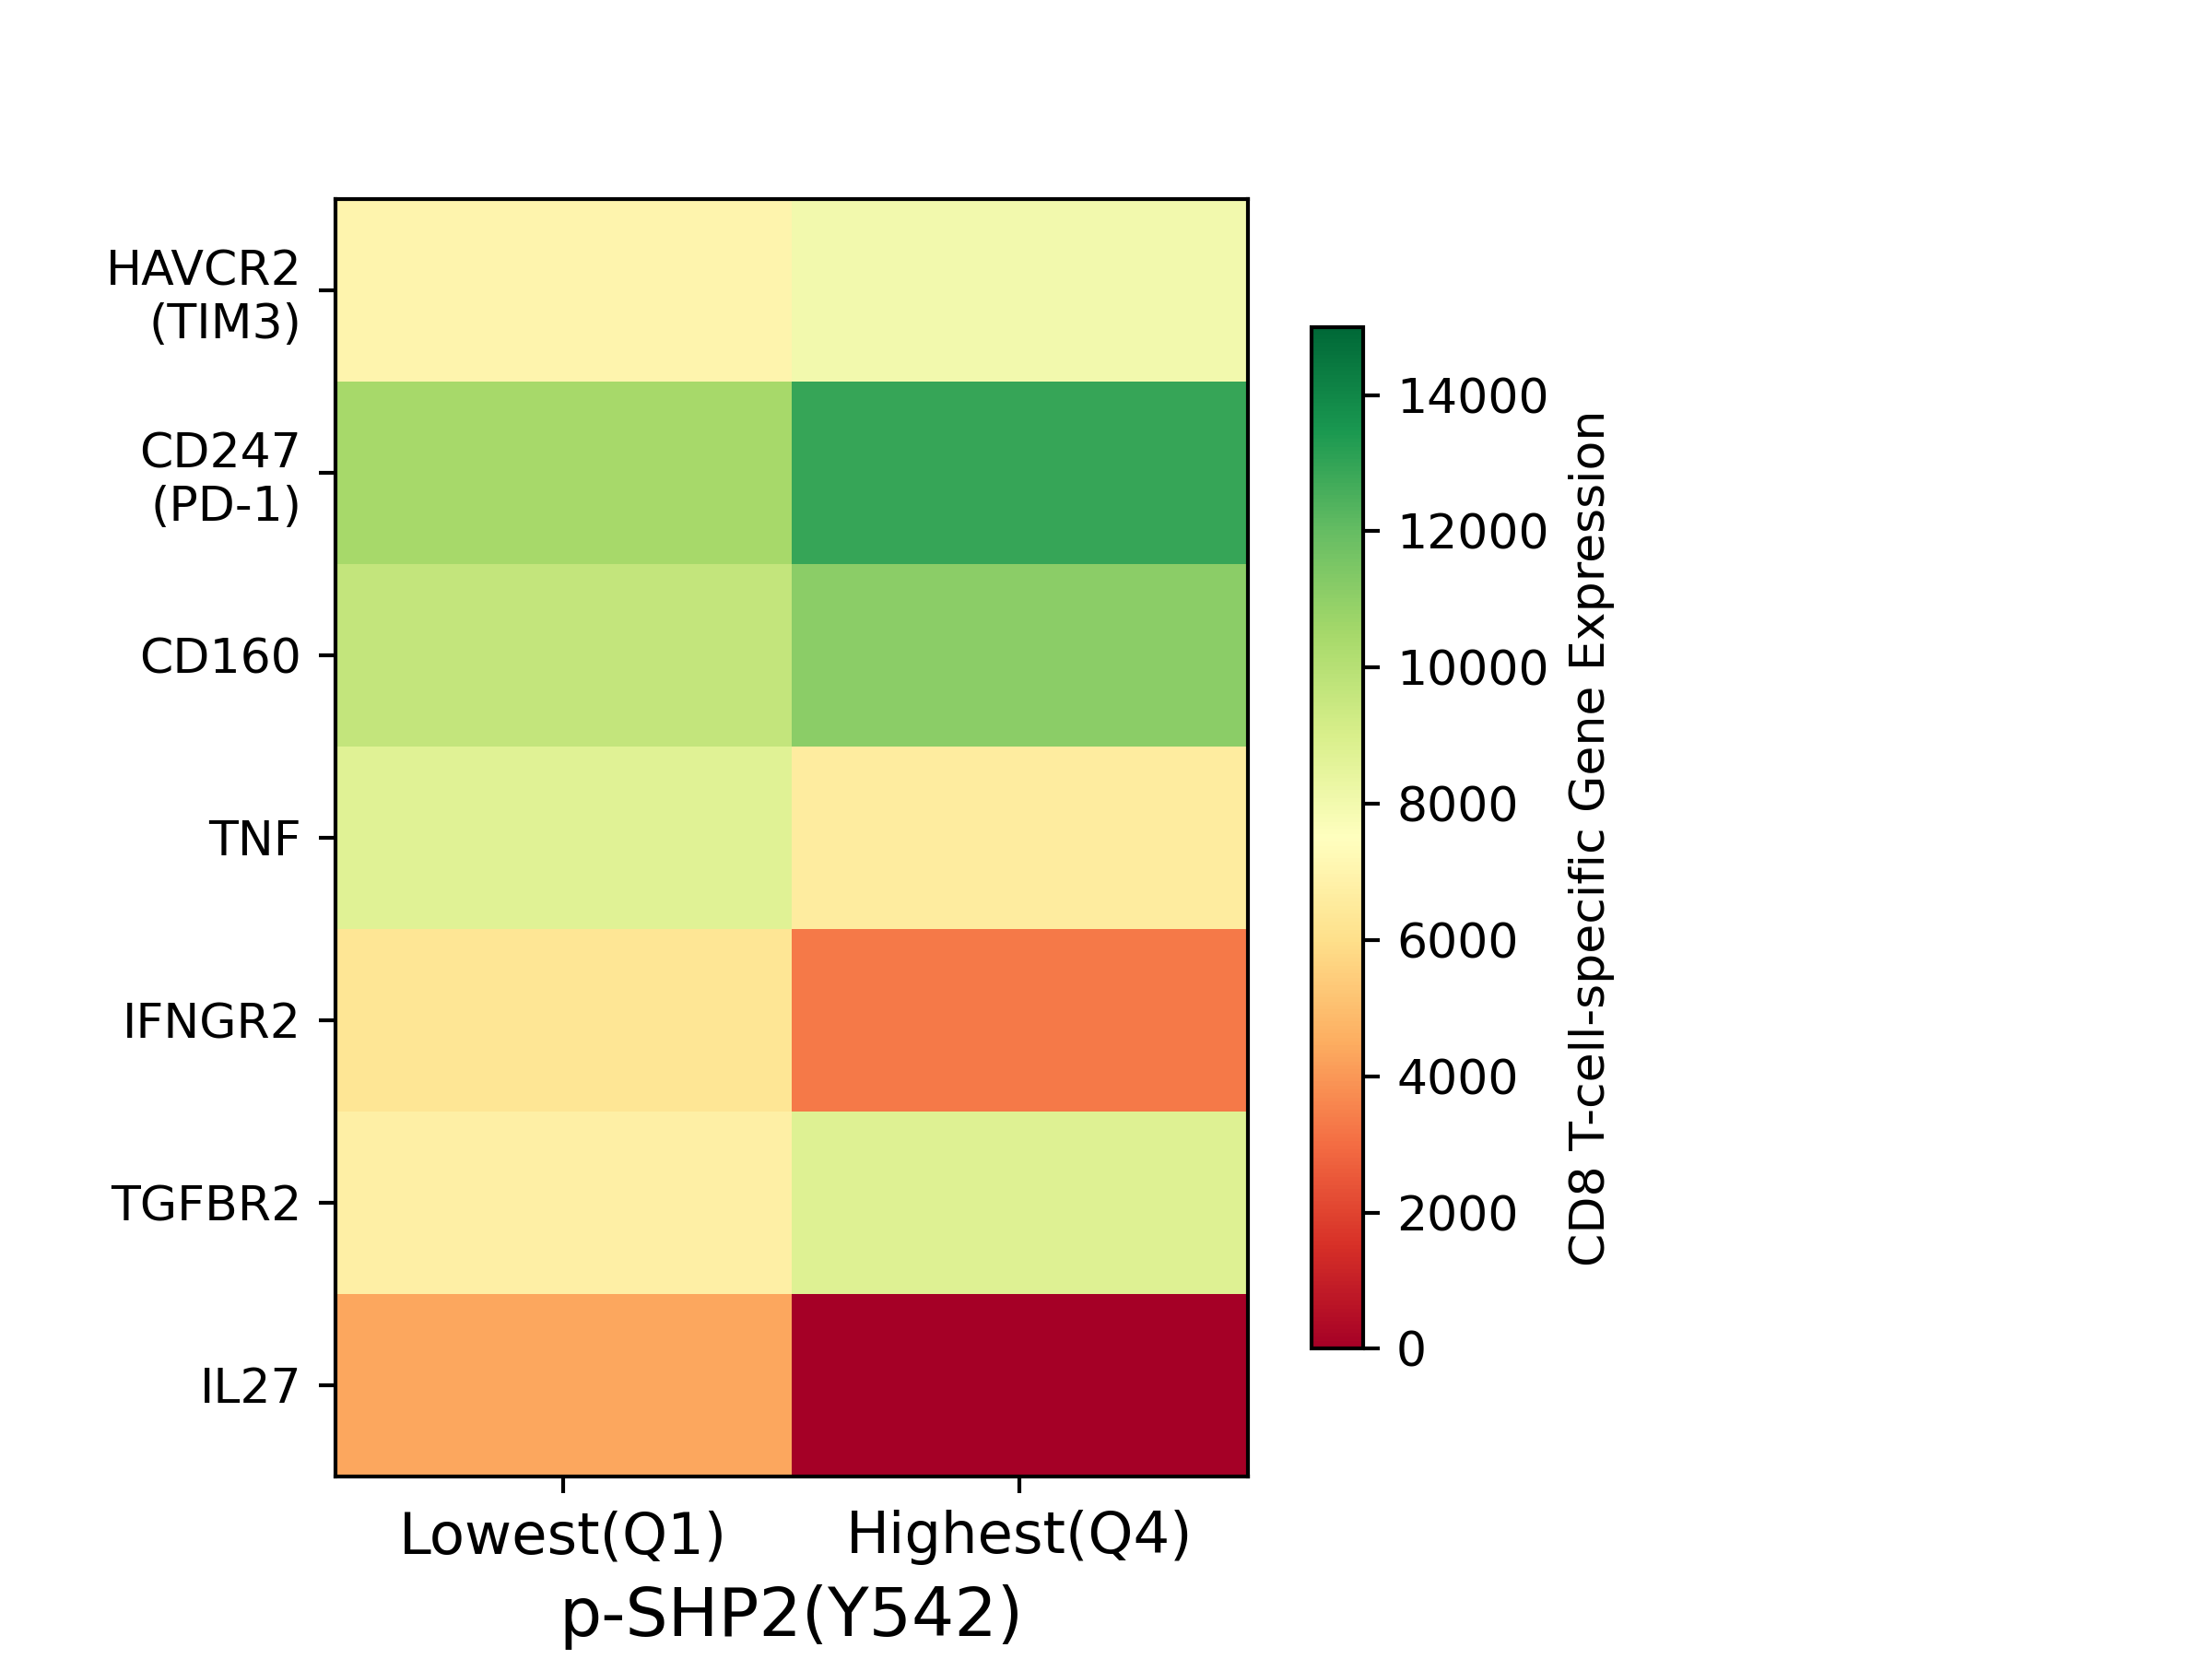

Text(0.5, 0, 'p-SHP2(Y542)')

In [43]:
# plot the heatmap according to the dataframe. 
fig, ax = plt.subplots(dpi=300)
im = ax.imshow(res2,"RdYlGn", vmin=0, vmax=15000,aspect=0.4)
# We want to show all ticks...
ax.set_xticks([0,1])
ax.set_yticks(np.arange(len(ls)))
plt.subplots_adjust(left=0.1, right=0.68)
# ... and label them with the respective list entries
ax.set_xticklabels(["Lowest(Q1)","Highest(Q4)"],fontsize=12)
ls=["HAVCR2\n(TIM3)","CD247\n(PD-1)","CD160","TNF","IFNGR2","TGFBR2","IL27"]
ax.set_yticklabels(ls,fontsize=10)
fig.colorbar(im, label="CD8 T-cell-specific Gene Expression",shrink=0.8)
fig.gca().set_xlabel("p-SHP2(Y542)",fontsize=14)